# Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# load the data
raw_df=pd.read_csv("datasets/train.csv")
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
raw_df.shape

(1460, 81)

# Data Cleansing  

In [4]:
# check missing values
missing=pd.DataFrame(raw_df.isnull().sum())
missing_values=missing[missing[0]!=0]
missing_values

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [5]:
# we can see the percentages of missing values of 
# Alley,FireplaceQu ,PoolQC, Fence, and MiscFeature are more than 40% 
# So  I will simply remove those columns
df=raw_df.drop(columns=["Alley","FireplaceQu",'PoolQC', 'Fence','MiscFeature']).dropna(axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Feature Engineering

In [6]:
new_df=df.copy()

In [7]:
num_col=['LotFrontage','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
        '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea',
        'GarageYrBlt','GarageArea','WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
        'PoolArea', 'MiscVal']

In [8]:
# to find all columns that contain "str" values
cat_col=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
           'TotRmsAbvGrd','Fireplaces','GarageCars', 'MoSold', 'YrSold','MSSubClass', 'OverallQual', 'OverallCond']
for i in range(len(new_df.columns)):
    if type(new_df[new_df.columns[i]][0])==str:
        cat_col.append(new_df.columns[i])

In [9]:
# Encode the catogorical data
from sklearn import  preprocessing
# create a function to transform the data 
def encode(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [10]:
# apply the function above
for i in new_df[cat_col].columns:
    new_df[i]= encode(new_df[cat_col][i])

In [11]:
new_df.shape,raw_df.shape # double check the size and shape

((1094, 76), (1460, 81))

# Distribution

In [12]:
len(num_col),len(cat_col)

(22, 52)

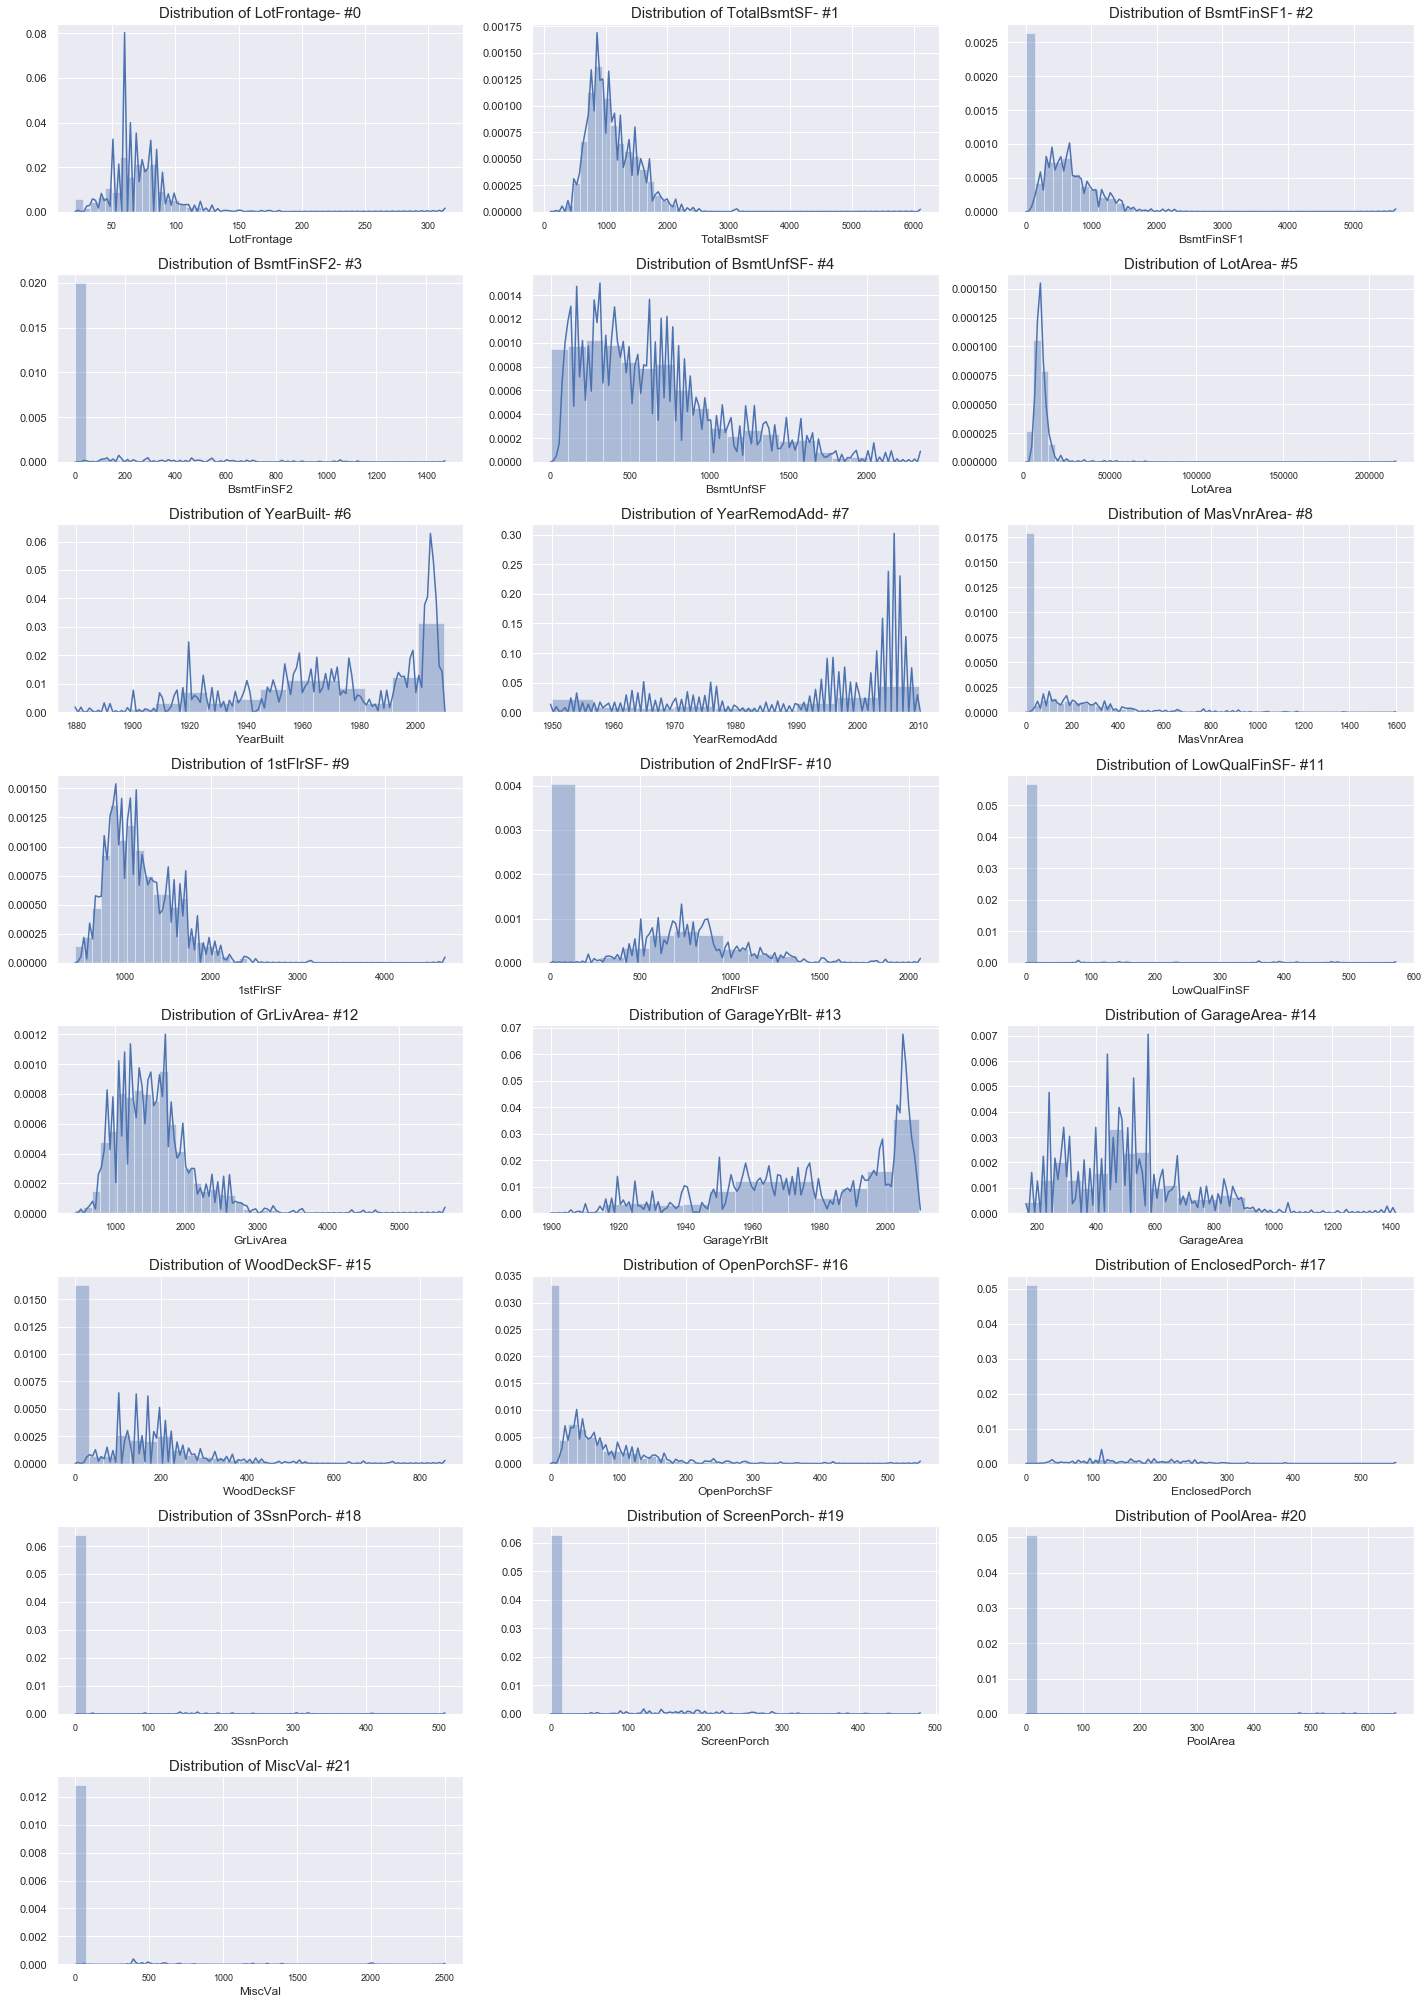

In [13]:
# numerical variabels distributions
plt.figure(figsize=(20,28))
for i in range(0,len(num_col)):
    plt.subplot(8,3,i+1)
    sns.distplot(new_df[num_col[i]],kde_kws={'bw': 0.1})
    plt.title("Distribution of {}- #{}".format(num_col[i],i),fontsize=15)
    plt.xticks(size=9)
plt.tight_layout()

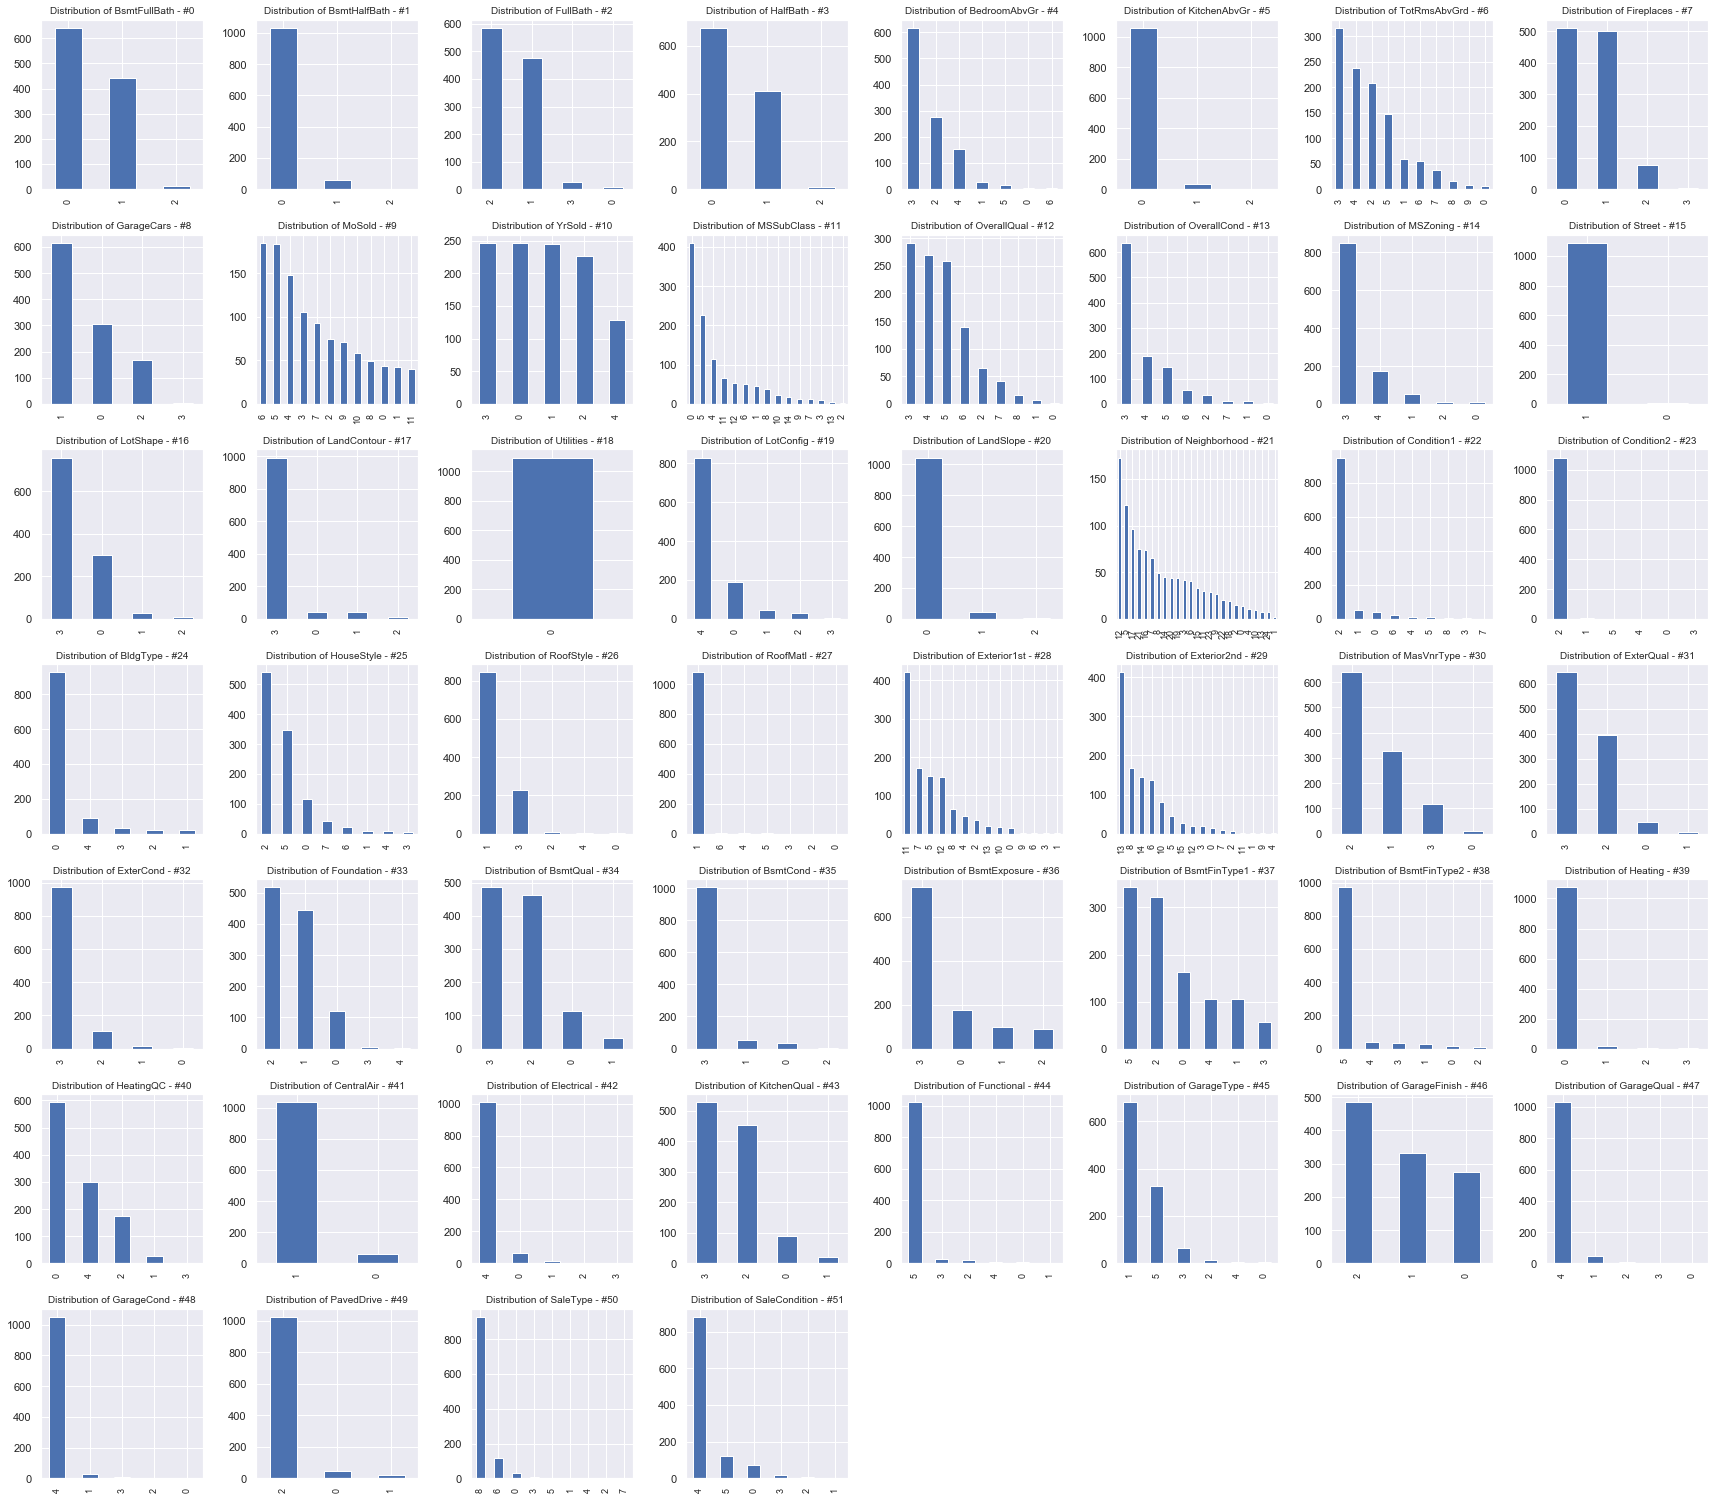

In [14]:
# catogorical data variabels distributions
plt.figure(figsize=(24,21))
for i in range(0,len(cat_col)):
    plt.subplot(7,8,i+1)
    new_df[cat_col[i]].value_counts().plot(kind='bar')
    plt.title("Distribution of {} - #{}".format( cat_col[i], i),fontsize=10)
    plt.xticks(size=9)

plt.tight_layout()



In [15]:
# we can see that some variables have "extrem" outliers or only contain sigle value which means those variables are 
# not really help us to explore more and cannot give us more information
# here I will simply remove those kind of variables
remove_index=[ 2,15,17,18,20,23,27,39,41,44,47,48]
remove_col=[cat_col[i] for i in remove_index]
remove_col

['FullBath',
 'Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Functional',
 'GarageQual',
 'GarageCond']

In [16]:
new_df.drop(columns=remove_col,inplace=True) # drop those columns

In [17]:
# update cat_col
for i in remove_col:
    cat_col.remove(i)
    
print(cat_col)# double check

['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSSubClass', 'OverallQual', 'OverallCond', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']


In [18]:
new_df.shape,len(cat_col)

((1094, 64), 40)

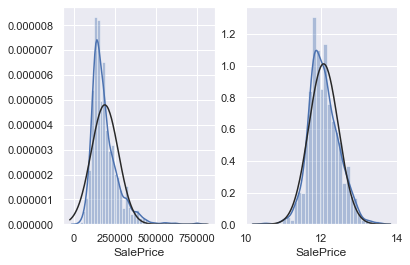

In [19]:
from scipy.stats import norm, skew #for some statistics
plt.subplot(1,2,1)
# distribution of Target
sns.distplot(new_df["SalePrice"],fit=norm)
# Get the fitted parameters used by the function
plt.subplot(1,2,2)
sns.distplot(np.log(new_df["SalePrice"]),fit=norm)


# Feature VS Target

## Numerical Variabels vs Target

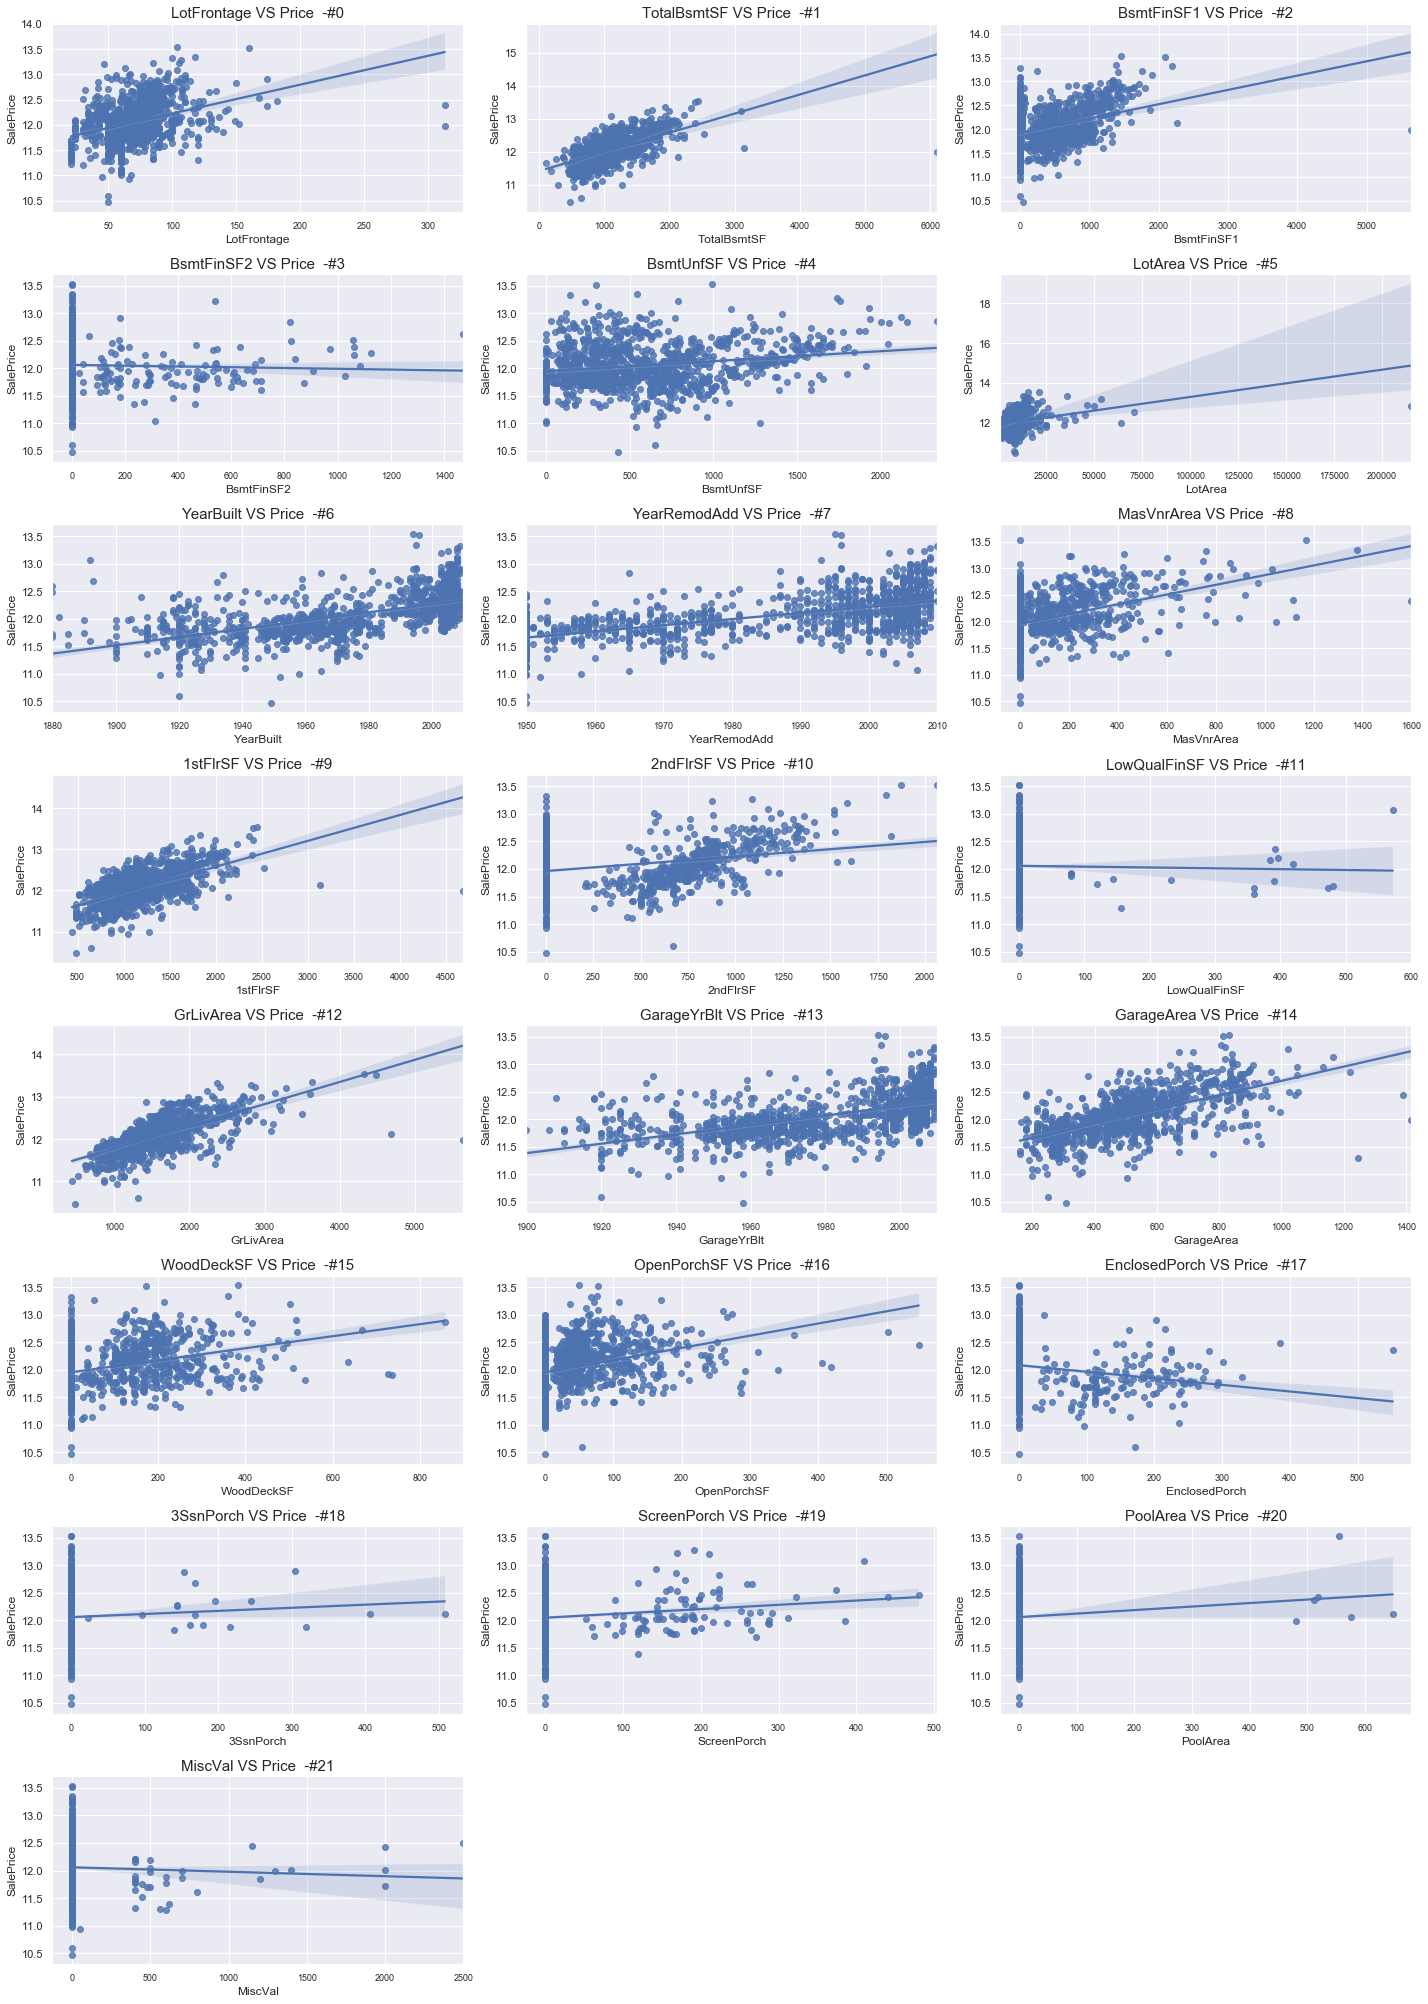

In [20]:
# numerical variabels vs target
plt.figure(figsize=(20,28))
for i in range(0,len(num_col)):
    plt.subplot(8,3,i+1)
    sns.regplot(new_df[num_col[i]],np.log(new_df["SalePrice"]))
    plt.title("{} VS Price  -#{}".format(num_col[i],i),fontsize=15)
    plt.xticks(size=9)
plt.tight_layout()

# Outliner Removal

In [21]:
# remove outlier for # 0,1,2,5,9,12,14,15 numerical variables 

# create a function to remove outliers 
def outlier_removal(df,col,quantile):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.title('Distribution Before Outlier Removal')
    plt.subplot(1,2,2)
    df_new=df[df[col]<df[col].quantile(quantile)]
    sns.distplot(df_new[col])
    plt.title('Distribution After Outlier Removal')
    plt.tight_layout()
    return df_new

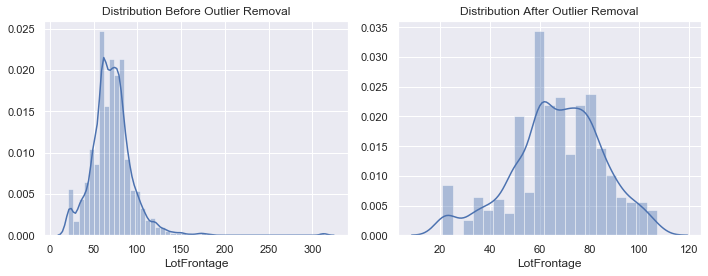

In [22]:
# LotFrontage
new_df1=outlier_removal(new_df,num_col[0],0.95)

TotalBsmtSF


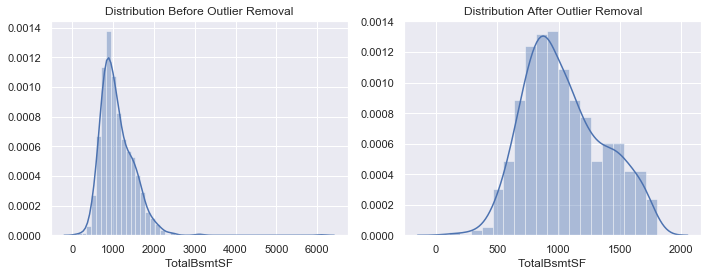

In [25]:
# TotalBsmtSF 0,1,2,5,9,12,14,15
print(num_col[1])
new_df2=outlier_removal(new_df,num_col[1],0.95)

BsmtFinSF1


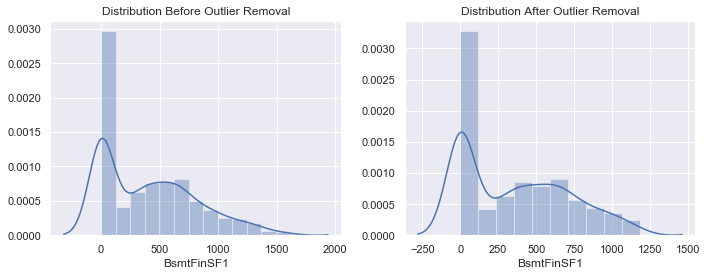

In [26]:
# BsmtFinSF1

print(num_col[2])
new_df3=outlier_removal(new_df2,num_col[2],0.95)

LotArea


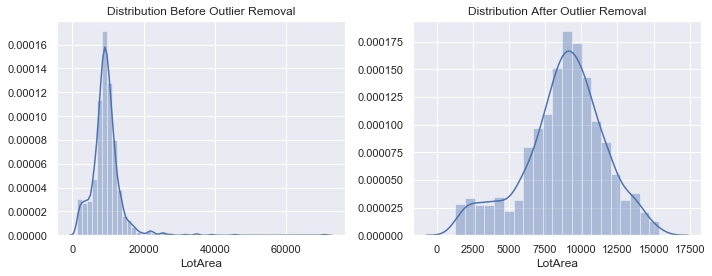

In [30]:
# LotArea
print(num_col[5])
new_df4=outlier_removal(new_df3,num_col[5],0.95)

1stFlrSF


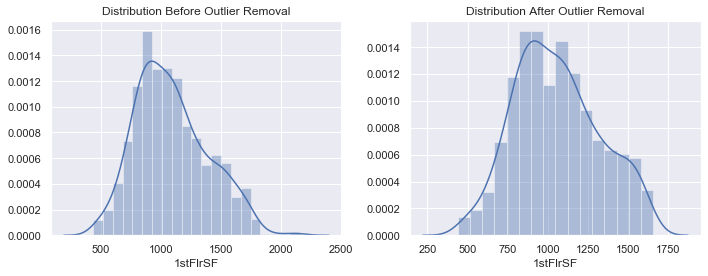

In [31]:
# 1stFlrSF
print(num_col[9])

new_df5=outlier_removal(new_df4,num_col[9],0.95)

GrLivArea


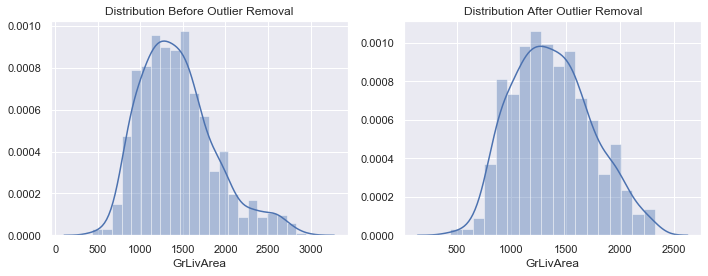

In [32]:
# GrLivArea

print(num_col[12])

new_df6=outlier_removal(new_df5,num_col[12],0.95)

GarageArea


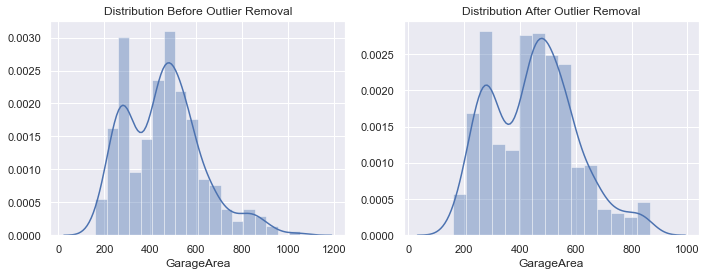

In [35]:
# GarageArea

print(num_col[14])

new_df7=outlier_removal(new_df6,num_col[14],0.98)

WoodDeckSF


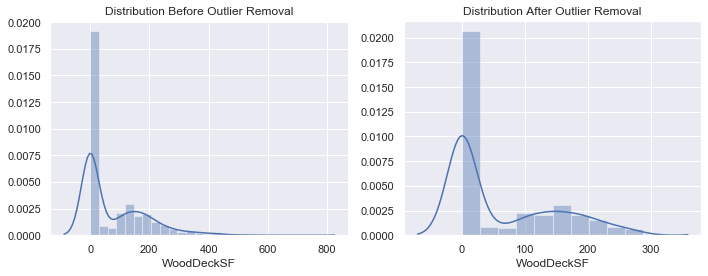

In [36]:
# WoodDeckSF
print(num_col[15])

new_df7=outlier_removal(new_df6,num_col[15],0.95)

In [37]:
# Based on the distribution and the scatter plots
# number [3,11,17,18,19,20,21] variables can be removed from num_col 
# those variables either do not have linearity with independent variable or are not informative
remove_indexs=[3,11,17,18,19,20,21]
remove_cols=[num_col[i] for i in remove_indexs]
remove_cols

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [38]:
# update cat_col
for i in remove_cols:
    num_col.remove(i)
    
print(num_col)# double check

['LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtUnfSF', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


In [39]:
new_df7.drop(columns=remove_cols,inplace=True) # drop those columns

/Users/yingyuxuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Catogorical Variabels Distributions

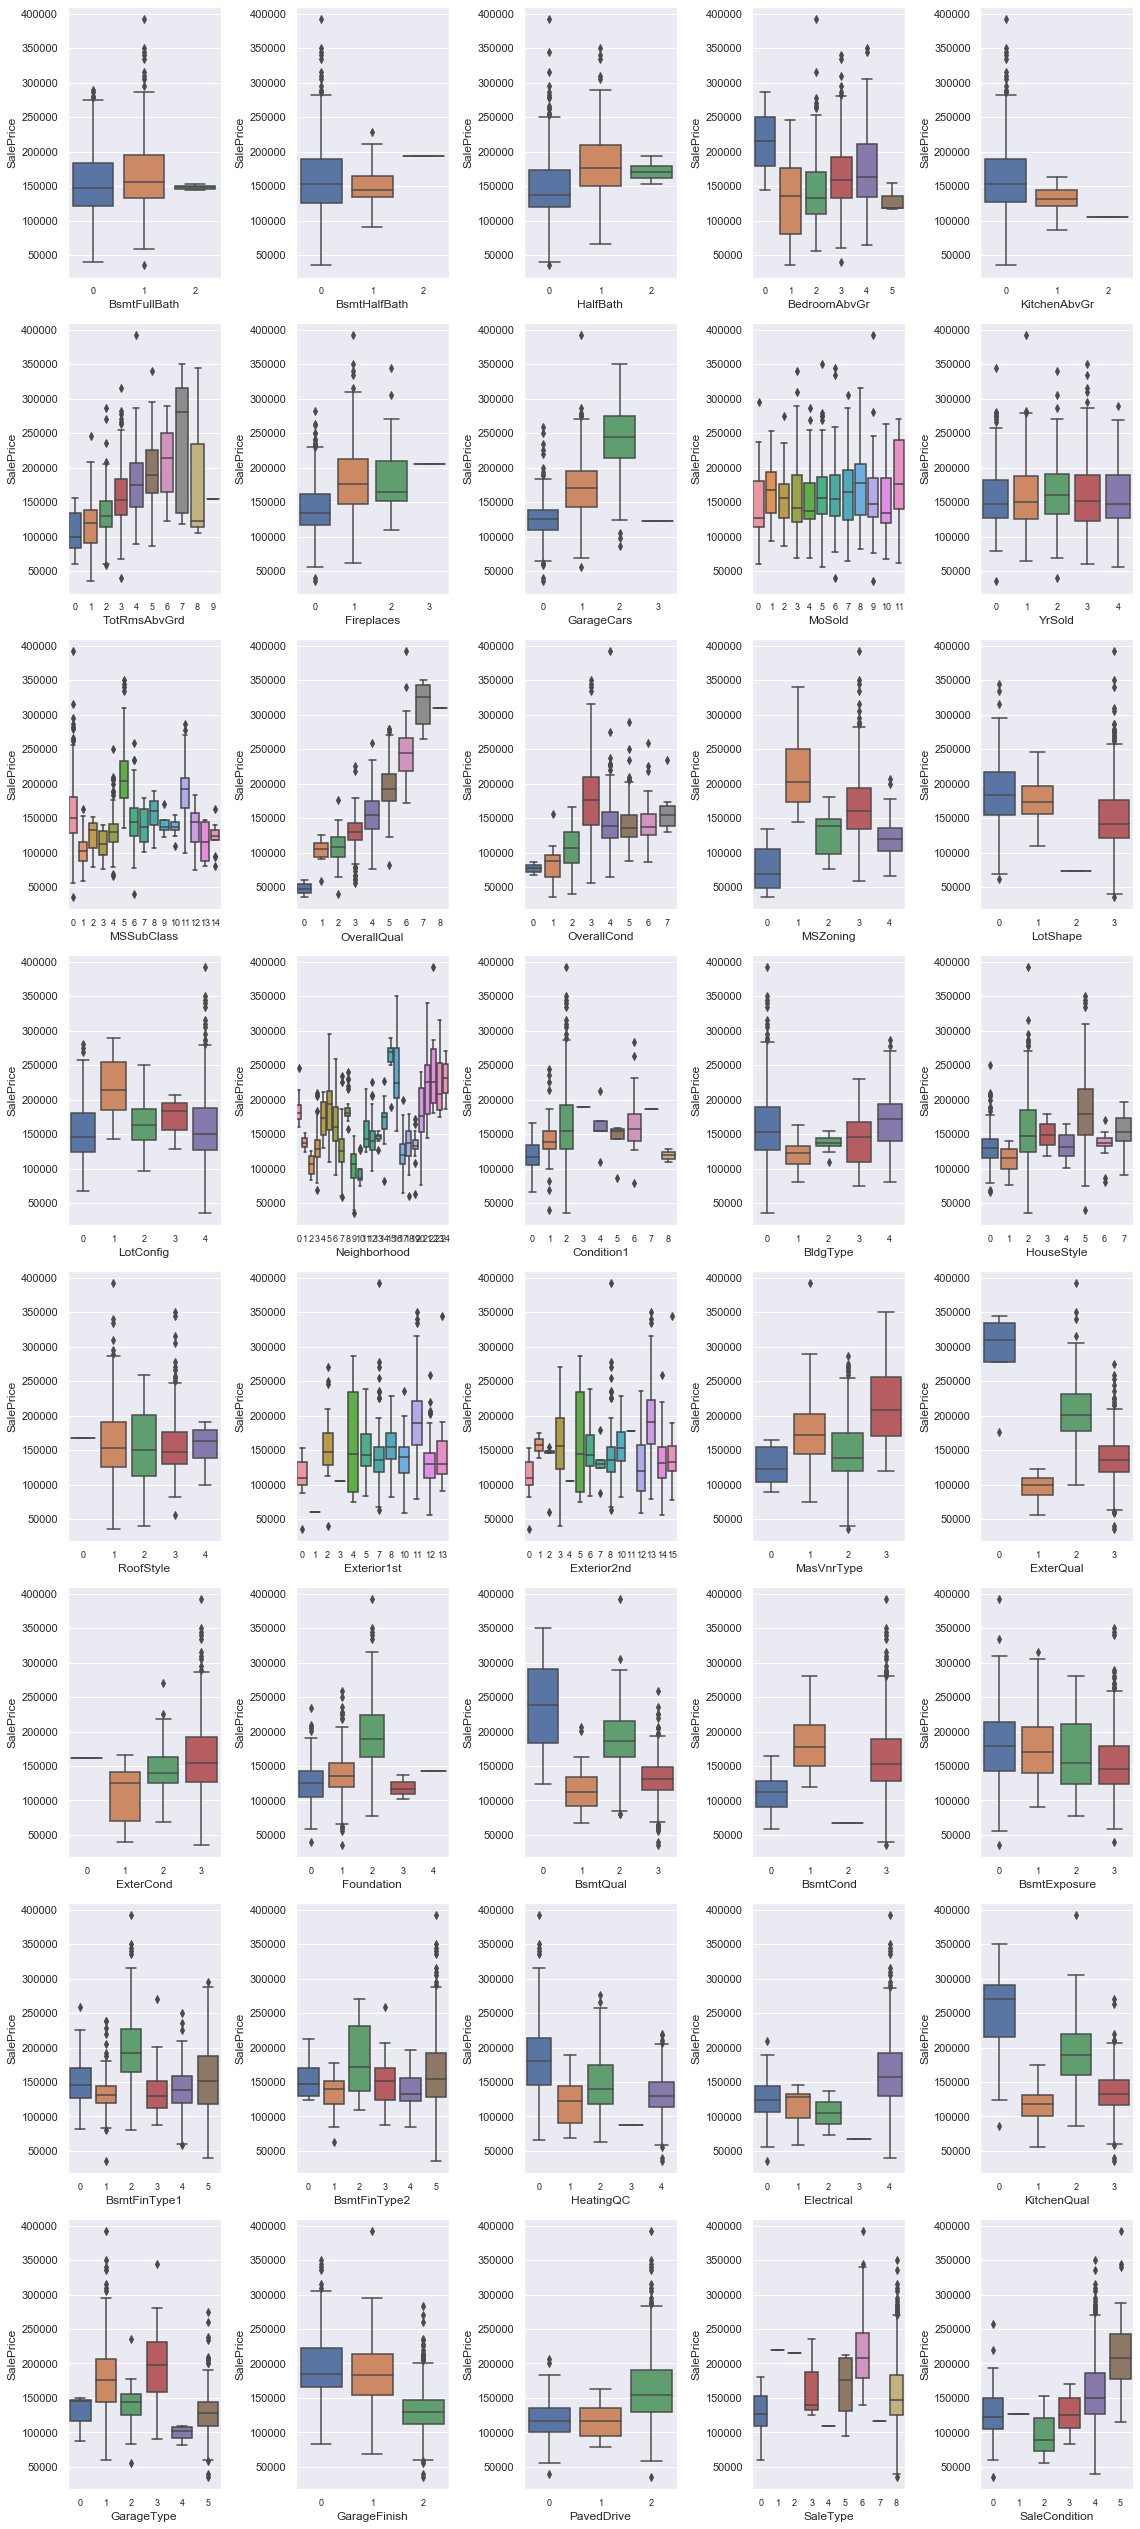

In [40]:
# catogorical variabels distributions
plt.figure(figsize=(16,48))
for i in range(0,len(cat_col)):
    plt.subplot(11,5,i+1)git
    sns.boxplot(new_df7[cat_col[i]],new_df7["SalePrice"])
   # plt.title("Distribution of {}".format( cat_col[i]),fontsize=10)
    plt.xticks(size=9)

plt.tight_layout()

# Scaled data


In [41]:
# Declare inputs and target
inputs=new_df7[cat_col+num_col]
target=np.log(new_df7.SalePrice)

In [42]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [43]:
inputs_scaled=pd.DataFrame(data=inputs_scaled,columns=inputs.columns)
inputs_scaled.head()

,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,...,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
0,1.313308,-0.232531,1.265587,0.344382,-0.160708,1.376390,-0.828382,0.454458,-1.635620,0.167078,...,1.086003,0.904681,0.793269,-0.697660,1.357363,0.924405,1.030192,0.538033,-0.742798,0.406067
1,1.313308,-0.232531,1.265587,0.344382,-0.160708,-0.141144,0.868636,0.454458,1.038118,0.167078,...,1.021081,0.858158,0.565296,-0.453024,1.388472,1.132969,0.954331,0.901231,-0.742798,0.057529
2,1.313308,-0.232531,-0.757837,0.344382,-0.160708,0.617623,0.868636,2.155490,-1.635620,-1.353714,...,-1.770561,-0.630593,-0.520930,-0.296304,1.103303,0.943615,0.840539,1.107043,-0.742798,-0.070880
3,1.313308,-0.232531,1.265587,1.835462,-0.160708,2.135157,0.868636,2.155490,2.184006,0.167078,...,0.988620,0.765111,1.825854,0.407026,1.873261,2.263601,0.916400,2.281382,1.532917,0.827982
4,1.313308,-0.232531,1.265587,-2.637778,-0.160708,-0.899911,-0.828382,0.454458,1.420081,0.927474,...,0.761394,0.532493,-0.520930,-0.927007,0.610737,-0.030594,0.650885,0.126409,-0.268690,-0.162601


# Train test split

In [44]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=520)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", x_test.shape, "Target: ",y_test.shape)


Training set - Features:  (640, 55) Target:  (640,)
Testing set - Features:  (161, 55) Target:  (161,)


# Feature Selection

In [45]:
#prepare our data 
feature_columns=inputs.columns
x_train =pd.DataFrame(data=x_train, columns=feature_columns)
x_test =pd.DataFrame(data=x_test, columns=feature_columns)

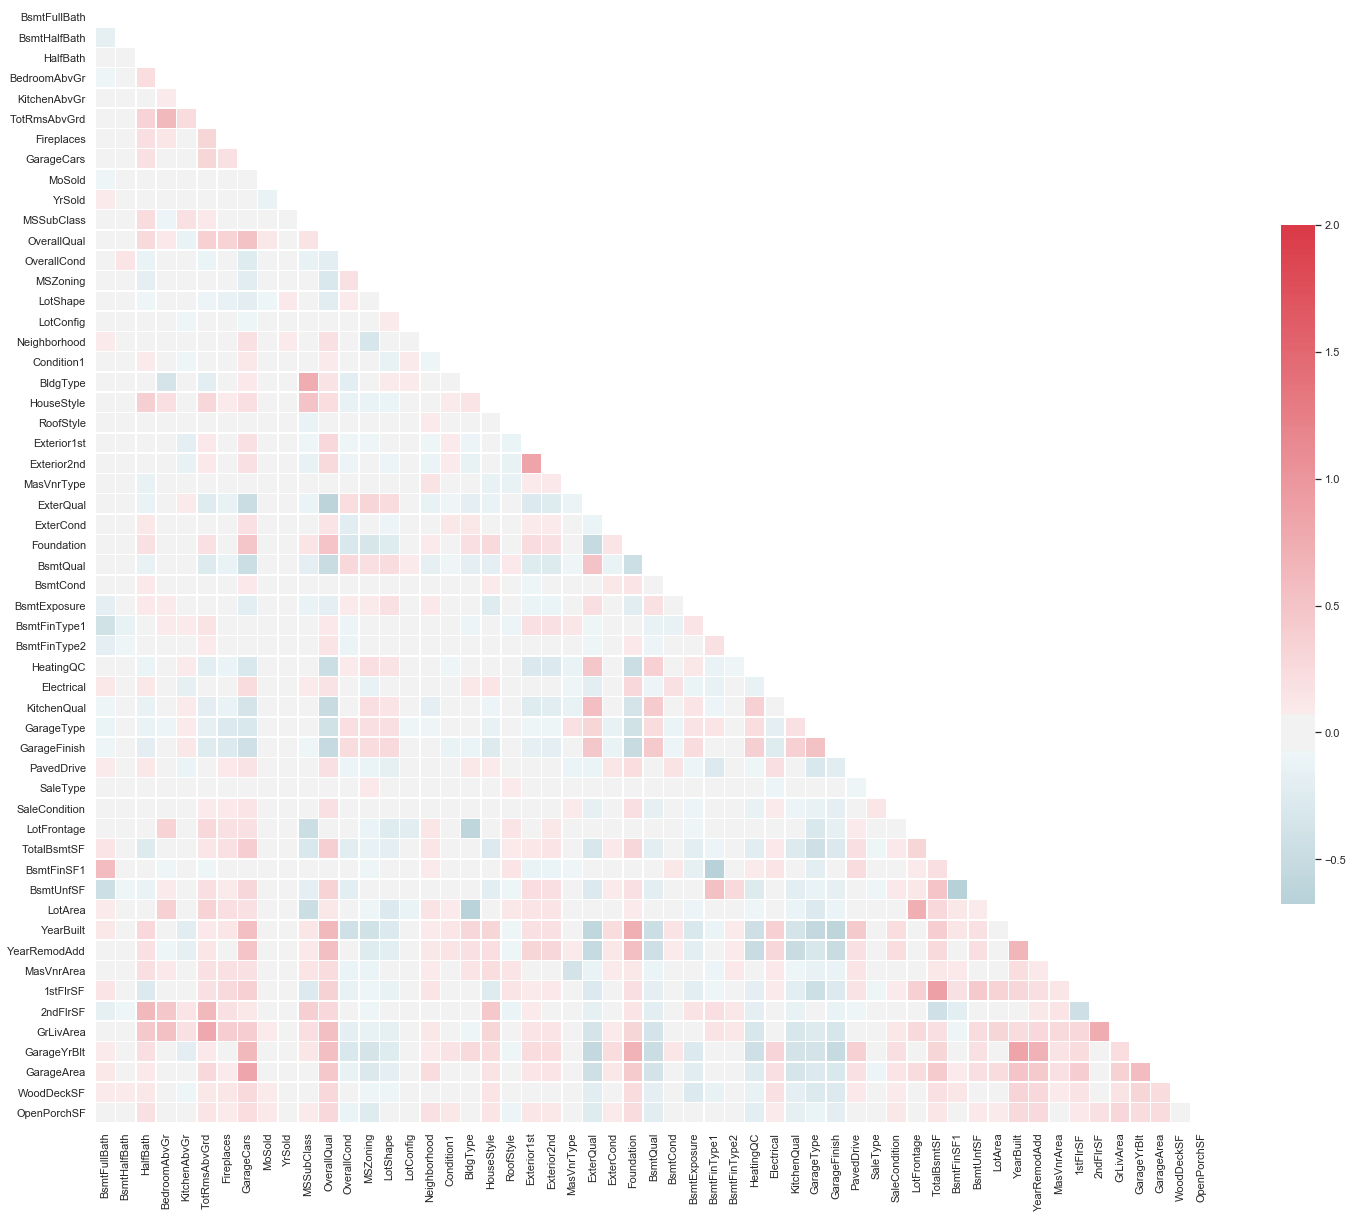

In [46]:
sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [47]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)

len(x_train.columns)

55

In [48]:
len(inputs.columns) # we can see that there are two columns got removed

55

In [49]:
len(x_train.columns)

55

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error


In [128]:
# Number of trees in random forest
n_estimators = list(range(1,100,1))

# Maximum number of levels in tree
max_depth = list(range(1,50))
# Minimum number of samples required to split a node
min_samples_split = list(range(1,30))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,30))
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap
              }


In [129]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(rf,random_grid,cv=20, verbose=1, random_state=46, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)


Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   28.6s finished


RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [130]:
# We can view the best parameters from fitting the random search:
rf_random.best_params_

{'n_estimators': 74}

In [131]:
# Evaluate Random Search
rf_random.best_score_

0.8338187465175846

In [132]:
# Random Forest model with best parameters
rfr= RandomForestRegressor(n_estimators=rf_random.best_params_["n_estimators"],
#                            max_features=rf_random.best_params_["max_features"],
#                             max_depth=rf_random.best_params_["max_depth"], 
#                             min_samples_split=rf_random.best_params_["min_samples_split"],
#                             min_samples_leaf=rf_random.best_params_["min_samples_leaf"],
#                            bootstrap=rf_random.best_params_['bootstrap'],
                           n_jobs=-1, 
                           random_state=46)
rfr.fit(inputs_scaled,target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=74, n_jobs=-1, oob_score=False,
                      random_state=46, verbose=0, warm_start=False)

In [133]:
#Scores for Train data and test data
rf_y_train_pre=rfr.predict(x_train)
print('Accuracy score of train data :{}'.format(rfr.score(x_train,y_train)))
rf_y_test_pre=rfr.predict(x_test)
print('Accuracy score of validation data :{}'.format(rfr.score(x_test,y_test)))


Accuracy score of train data :0.977617456450812
Accuracy score of validation data :0.9702950460335585


In [134]:
#RMSE
def RMSE(actual,prediction):
    rmse=np.sqrt(mean_squared_error(actual, prediction))
    return rmse

In [135]:
print('RMSE - {}'.format(RMSE(y_test,rf_y_test_pre)))

RMSE - 0.057323395358298536


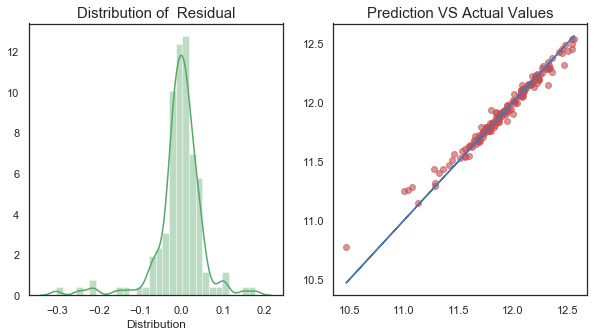

In [136]:
# distribution of residual
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_test-rf_y_test_pre,color='g')
plt.title('Distribution of  Residual', fontsize=15)
plt.xlabel('Distribution')

plt.subplot(1,2,2)
plt.scatter(y_test, rf_y_test_pre,color='r',alpha=0.6)
plt.plot(y_test,y_test)
plt.title('Prediction VS Actual Values',fontsize=15)
plt.show()

# Load the test data

In [137]:
# load the data
raw_test_df=pd.read_csv('datasets/test.csv')
raw_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [138]:
raw_test_df.shape

(1459, 80)

In [139]:
# select the same columns from train data 

test_df=raw_test_df[cat_col+num_col]# rename it
test_df.head()# first five rows

,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,...,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
0,0.0,0.0,0,2,1,5,0,1.0,6,2010,...,1961,1961,0.0,896,0,896,1961.0,730.0,140,0
1,0.0,0.0,1,3,1,6,0,1.0,6,2010,...,1958,1958,108.0,1329,0,1329,1958.0,312.0,393,36
2,0.0,0.0,1,3,1,6,1,2.0,3,2010,...,1997,1998,0.0,928,701,1629,1997.0,482.0,212,34
3,0.0,0.0,1,3,1,7,1,2.0,6,2010,...,1998,1998,20.0,926,678,1604,1998.0,470.0,360,36
4,0.0,0.0,0,2,1,5,0,2.0,1,2010,...,1992,1992,0.0,1280,0,1280,1992.0,506.0,0,82


# Data Cleaning

In [140]:
# data cleansing
test_df.isnull().sum()

BsmtFullBath       2
BsmtHalfBath       2
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
MoSold             0
YrSold             0
MSSubClass         0
OverallQual        0
OverallCond        0
MSZoning           4
LotShape           0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
RoofStyle          0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
HeatingQC          0
Electrical         0
KitchenQual        1
GarageType        76
GarageFinish      78
PavedDrive         0
SaleType           1
SaleCondition      0
LotFrontage      227
TotalBsmtSF        1
BsmtFinSF1         1
BsmtUnfSF          1
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea   

In [141]:
# fill out the missing values with mode for catogorical data
for column in cat_col:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)

/Users/yingyuxuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [142]:
test_df[cat_col].isnull().sum()# double check the missing values

BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
MoSold           0
YrSold           0
MSSubClass       0
OverallQual      0
OverallCond      0
MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
Electrical       0
KitchenQual      0
GarageType       0
GarageFinish     0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [143]:
# encode the data
for col in cat_col:
    test_df[col]=encode(test_df[col])

/Users/yingyuxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [144]:
test_df[cat_col].head()# take a look at the transformed data

,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,...,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,0,0,0,2,1,2,0,1,5,4,...,4,3,4,3,3,1,2,2,8,4
1,0,0,1,3,1,3,0,1,5,4,...,0,5,4,3,2,1,2,2,8,4
2,0,0,1,3,1,3,1,2,2,4,...,2,5,2,3,3,1,0,2,8,4
3,0,0,1,3,1,4,1,2,5,4,...,2,5,0,3,2,1,0,2,8,4
4,0,0,0,2,1,2,0,2,0,4,...,0,5,0,3,2,1,1,2,8,4


In [145]:
# beside catogorical data , we also need to clean numerical data
test_df[num_col].isnull().sum().reset_index()

,index,0
0,LotFrontage,227
1,TotalBsmtSF,1
2,BsmtFinSF1,1
3,BsmtUnfSF,1
4,LotArea,0
5,YearBuilt,0
6,YearRemodAdd,0
7,MasVnrArea,15
8,1stFlrSF,0
9,2ndFlrSF,0


In [146]:
missing_col=[
 'LotFrontage',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'MasVnrArea',
 'GarageYrBlt',
 'GarageArea']

In [147]:
# fill out the data 
for col in missing_col:
    test_df[col].fillna(test_df[col].median(),inplace=True)

/Users/yingyuxuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [148]:
test_df.isnull().sum()# now there is not any  missing values

BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
MoSold           0
YrSold           0
MSSubClass       0
OverallQual      0
OverallCond      0
MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
Electrical       0
KitchenQual      0
GarageType       0
GarageFinish     0
PavedDrive       0
SaleType         0
SaleCondition    0
LotFrontage      0
TotalBsmtSF      0
BsmtFinSF1       0
BsmtUnfSF        0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageYrBlt      0
GarageArea  

In [149]:
# standardization
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(test_df[x_train.columns])
# Scale the features and store them in a new variable (the actual scaling procedure)
scaled_test_input = scaler.transform(test_df[x_train.columns])

In [150]:
# Now use the model to predict
test_df_prediction=rfr.predict(scaled_test_input)

# Submision

In [151]:
submision=pd.DataFrame()
submision['Id']=raw_test_df['Id']
submision['SalePrice']=np.exp(test_df_prediction)
submision.head()

,Id,SalePrice
0,1461,123281.704450
1,1462,146448.807722
2,1463,180377.433248
3,1464,180466.493680
4,1465,184646.285395


In [152]:
submision.to_csv('submision.csv',index=False)

In [153]:
submision.shape

(1459, 2)